## **Algoritmo t-SNE**

Para una primera visualización del proceso desarrollado por el algoritmo, se emplerará la base de datos MNIST de dígitos escritos a mano y etiquetados.

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

Se realiza un visualización de los datos para comprender su estructura y la dimensionalidad de la base de datos

<Figure size 640x480 with 0 Axes>

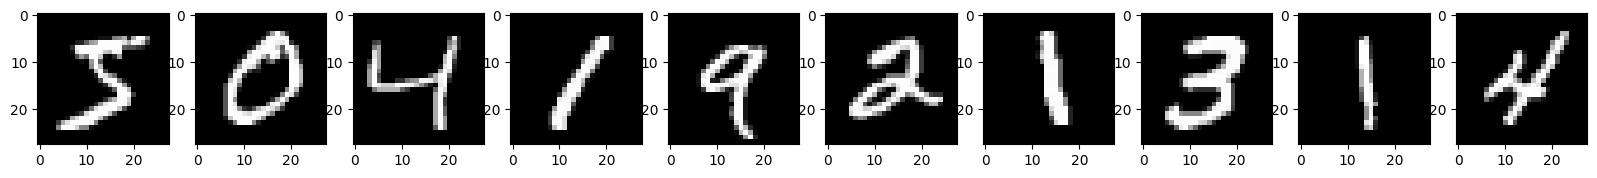

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
plt.gray()
fig, axes = plt.subplots(1,10,figsize=(20,10))
for k,ax in enumerate(axes):
    ax.imshow(X_train[k])

In [8]:
X_test.shape


(10000, 28, 28)

Requerimos para la entrada a t-SNE, "aplanar" las imagenes

In [9]:
x_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
x_test.shape

(10000, 784)

De igual forma, es conveniente auqnue no necesario, realizar un escalado de los datos de entrada.

In [20]:
from sklearn.preprocessing import StandardScaler
x_test = StandardScaler().fit_transform(x_test)

Importamos la libreria correspondiente e implementamos el algoritmo con los hiperparámetros por defecto, excepto el número de componentes que indicamos 2, para poder visualizar en dos dimensiones el resultado. Es decir, una perplejidad de 30 y un learning rate de 200.

In [11]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
output = tsne.fit_transform(x_test)

Observamos la salida correspondiente del algoritmo, lo cual corresponde con las coordenadas en el plano que ha sido proyectadas a partir de las 784 variables de cada imagen

In [12]:
print("Dimensión de la matriz de salida:", output.shape)
print("Primeras 5 filas de la matriz de salida:")
print(output[:5, :])

Dimensión de la matriz de salida: (10000, 2)
Primeras 5 filas de la matriz de salida:
[[-70.64269    42.08278  ]
 [ -2.5123093 -66.66977  ]
 [-37.5355    -43.747765 ]
 [ 58.644806    5.6081514]
 [ -5.5583043  56.29549  ]]


Ahora visualizamos los resultados en las dimensiones proyectadas. Básicamente representamos el output del algoritmo TSNE, junto con las etiquetas reales, asignándole un color.

<Axes: >

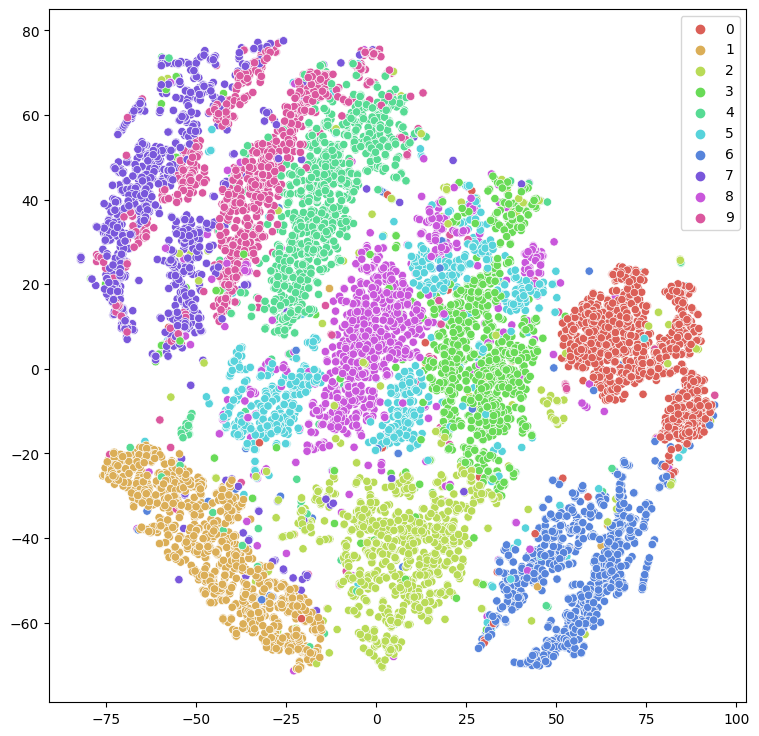

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
palette = sns.color_palette("hls", 10)
fig,ax=plt.subplots(1,1,figsize=(9,9))
sns.scatterplot(x = output[:,0]
                , y = output[:,1]
                , hue = Y_test
                , palette = palette
                , legend = 'full')


## **Comparación con PCA**

Con el mismo conjunto de datos realizamos una reducción de la dimensionalidad aplicando ahora PCA

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
outputpca = pca.fit_transform(x_test)



(10000, 2)

<Axes: >

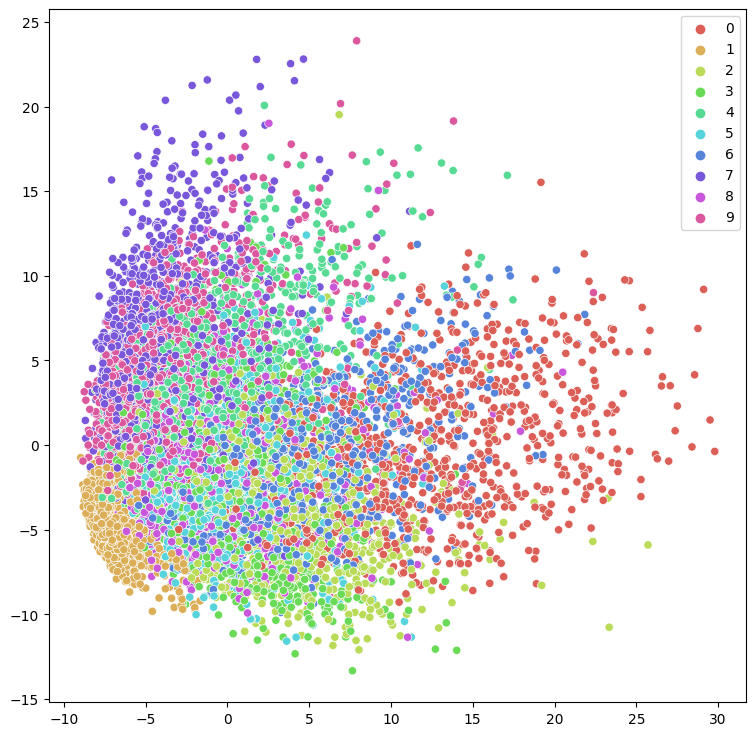

In [15]:
palette = sns.color_palette("hls", 10)
fig,ax=plt.subplots(1,1,figsize=(9,9))
sns.scatterplot(x = outputpca[:,0]
                , y = outputpca[:,1]
                , hue = Y_test
                , palette = palette
                , legend = 'full')

# Aplicación de un algoritmo de clasificación con reducción de dimensionalidad

Primero aplicamos SVC con los datos obtenidos por t-SNE y evaluamos su precisión

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [28]:
# Crear el clasificador SVC y entrenarlo con las coordenadas proyectadas por t-SNE
svc_model_tsne = SVC()
svc_model_tsne.fit(output, Y_test)

# Predecir las etiquetas para los datos de prueba utilizando el clasificador SVC
y_pred_tsne = svc_model_tsne.predict(output)

# Calcular la precisión del clasificador
accuracy_tsne = accuracy_score(Y_test, y_pred_tsne)
print("Precisión del clasificador SVC:", accuracy_tsne)

Precisión del clasificador SVC: 0.8327


Ahora lo realizamos con los datos sin reducir la dimensionalidad

In [27]:
# Crear el clasificador SVC y entrenarlo con los datos de test
svc_model = SVC()
svc_model.fit(x_test, Y_test)

# Predecir las etiquetas para los datos de prueba
y_pred = svc_model.predict(x_test)

# Calcular la precisión del clasificador
accuracy = accuracy_score(Y_test, y_pred)
print("Precisión del clasificador SVC:", accuracy)

Precisión del clasificador SVC: 0.9858


Finalmente, lo realizamos con la reducción de PCA

In [42]:
# Crear el clasificador SVC y entrenarlo con las coordenadas proyectadas por t-SNE
svc_model_pca = SVC()
svc_model_pca.fit(outputpca, Y_test)
# Predecir las etiquetas para los datos de prueba utilizando el clasificador SVC
y_pred_pca = svc_model_pca.predict(outputpca)

# Calcular la precisión del clasificador
accuracy_pca = accuracy_score(Y_test, y_pred_pca)
print("Precisión del clasificador SVC:", accuracy_pca)


Precisión del clasificador SVC: 0.4354


**Perplexity**

In [45]:
from sklearn.manifold import TSNE
tsne2 = TSNE(n_components=2, perplexity=10)
output1 = tsne.fit_transform(x_test)

<Axes: >

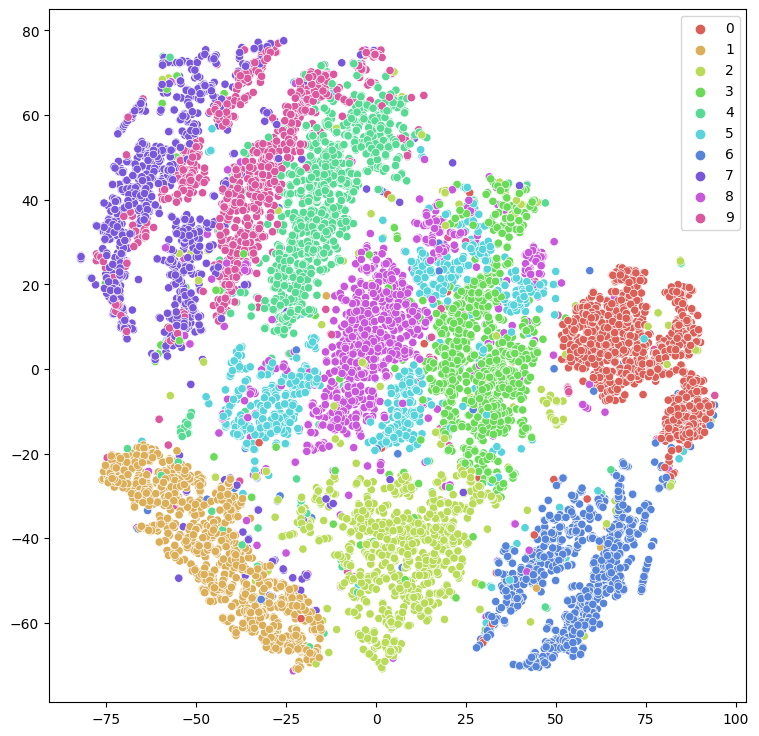

In [44]:
palette = sns.color_palette("hls", 10)
fig,ax=plt.subplots(1,1,figsize=(9,9))
sns.scatterplot(x = output1[:,0]
                , y = output1[:,1]
                , hue = Y_test
                , palette = palette
                , legend = 'full')

### Reducción de dimensionalidad por ISOMAP

In [46]:
from sklearn.manifold import Isomap

In [47]:
isomap = Isomap(n_components=2)
output_iso = isomap.fit_transform(x_test)

<Axes: >

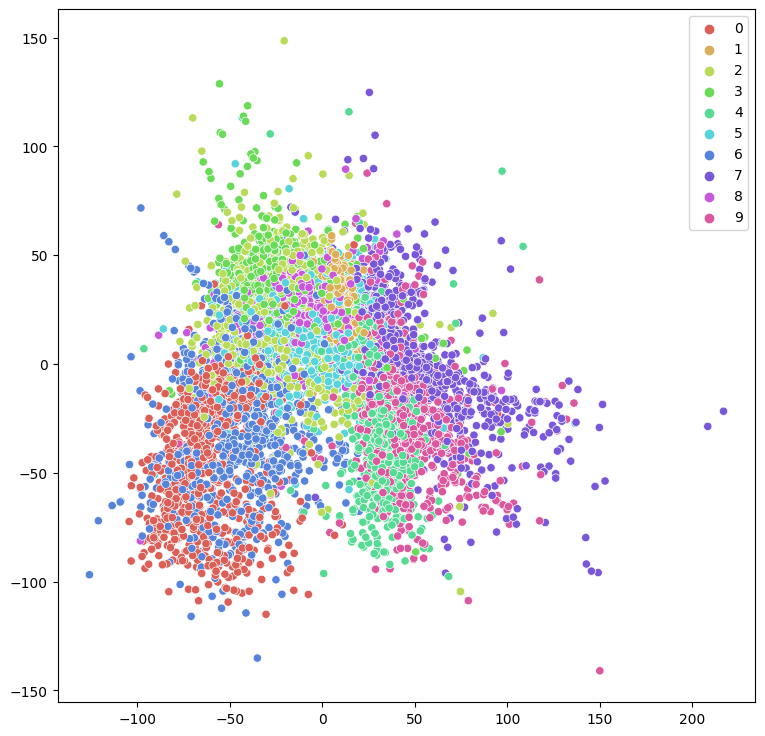

In [48]:
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
palette = sns.color_palette("hls", 10)
fig,ax=plt.subplots(1,1,figsize=(9,9))
sns.scatterplot(x = output_iso[:,0]
                , y = output_iso[:,1]
                , hue = Y_test
                , palette = palette
                , legend = 'full')